In [ ]:
#installing the required libraries
pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import speech_recognition as sr

In [ ]:
r = sr.Recognizer()
audio = sr.AudioFile('food.wav')

# Data Preprocessing

In [ ]:
#using wave to find out the details of the input provided
import wave
obj = wave.open('food.wav','r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()

Number of channels 2
Sample width 2
Frame rate. 44100
Number of frames 175584384
parameters: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=175584384, comptype='NONE', compname='not compressed')


In [ ]:
#importing the required libraries 
import os 
import speech_recognition as sr
import wave
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

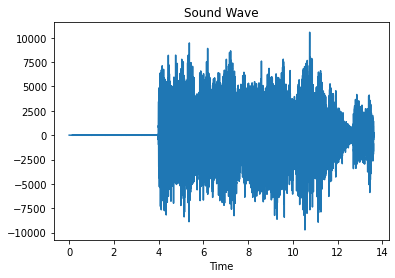

In [ ]:

#opening the file using wave
raw = wave.open("food.wav")
	
  #reading the signal of 300000 frames
signal = raw.readframes(300000)
signal = np.frombuffer(signal, dtype ="int16")
	
	# gets the frame rate
f_rate = raw.getframerate()

  #for plotting the time, we divide the len of the signal with the frame rate.
time = np.linspace(
	0, # start
	len(signal) / f_rate,
	num = len(signal)
)

#using matplotlib for the plot
plt.figure(1)
plt.title("Sound Wave")
plt.xlabel("Time")
plt.plot(time, signal)
plt.show()
 

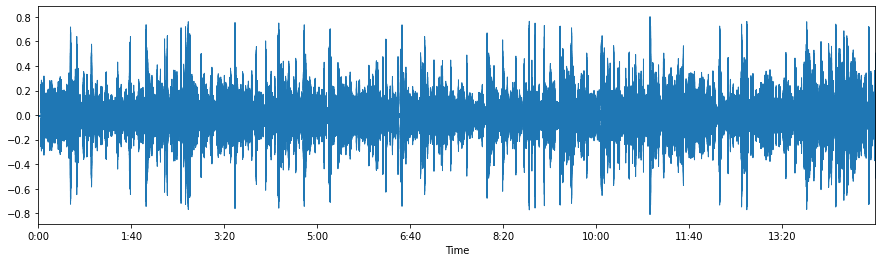

In [ ]:
#using the librosa library and plot the wave file for time and sample rate for the provided wav file.
plt.figure(figsize=(15,4))
data1,sample_rate1 = librosa.load('food.wav', sr=44100, mono=True, offset=0.0, duration=900, res_type='kaiser_best')
librosa.display.waveplot(data1,sr=sample_rate1, max_points=50000.0,x_axis='time', offset=0.0, max_sr=1000)

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


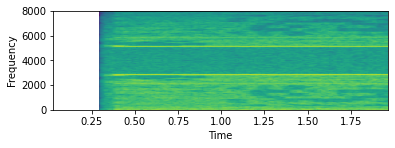

In [ ]:
#using the wav file to plot the energry vs sample rate and time vs frequency graphs

signal_wave = wave.open("food.wav", 'r')
sig = np.frombuffer(signal_wave.readframes(16000), dtype=np.int16)
plt.figure(1)


plot_b = plt.subplot(212)
plot_b.specgram(sig, NFFT=1024, Fs=16000, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()

# Speech to Text

In [ ]:
#intializing text to empty first
finalText=""
#the intial offset is 0
offset=0
#i in the range of for the duration offset, we repeat the conversion
for i in range(10):
  #using the recogniser to find the text from the audio
  r = sr.Recognizer()
  audio = sr.AudioFile('food.wav')
  with audio as source:
    audio = r.record(source, duration=300,offset=offset) 
  # set offset as 300
  offset=offset+300
  text=r.recognize_google(audio)
  finalText=finalText+text ## recognizing the speech and converting into text
print(finalText)

hello my name is food toxicology would like to welcome back once again today the subject of the lecture is going to be the history of us food regulation and then those of you that there are new to this field might ask about the intersection of food and regulation if you think about food in the food system in its purest sense when we were all eating out of are home gardens are on farms it was a complete control between us and the food that we eat at as we started broadening out as we started leaving the Farms coming to urban areas we had more and more distance between the food we eat and the production sources and so when you have that distance there is perhaps in an economic system the opportunity or perhaps even an incentive to cheat and cheating sometimes had toxic consequences as well there were talks illness and so we now have the evolution of the development of food regulation in the United States purpose of today to the outrage of the public in a certain sense we have laws and re

# Adding Punctuations

In [ ]:
pip install deepmultilingualpunctuation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#using the punctuation model to get the converted text with punctuations
from deepmultilingualpunctuation import PunctuationModel
!pip install transformers

model = PunctuationModel()
text = text1
clean_text=model.preprocess(text)
labeled_words=model.predict(clean_text)
result = model.restore_punctuation(text)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/transformers/pipelines/token_classification.py:136: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="none"` instead.
  "`grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to"


In [ ]:
#predicted accuracy
print(labeled_words)


[['hello', ',', 0.89068866], ['my', '0', 0.9999896], ['name', '0', 0.9998072], ['is', '0', 0.9979177], ['food', '0', 0.9322935], ['toxicology', '0', 0.55571455], ['would', '0', 0.99997175], ['like', '0', 0.9999306], ['to', '0', 0.99996376], ['welcome', '0', 0.99989593], ['back', '0', 0.9854005], ['once', '0', 0.9999578], ['again', '.', 0.6212783], ['today', '.', 0.49416935], ['the', '0', 0.99999166], ['subject', '0', 0.9999918], ['of', '0', 0.999992], ['the', '0', 0.99999213], ['lecture', '0', 0.99997413], ['is', '0', 0.9999857], ['going', '0', 0.99999106], ['to', '0', 0.99999094], ['be', '0', 0.99942744], ['the', '0', 0.9999914], ['history', '0', 0.99985194], ['of', '0', 0.99990964], ['us', '0', 0.48965815], ['food', '0', 0.9993857], ['regulation', ',', 0.51961744], ['and', '0', 0.99830806], ['then', '0', 0.97375214], ['those', '0', 0.99998236], ['of', '0', 0.9999914], ['you', '0', 0.9992137], ['that', '0', 0.99987125], ['there', '0', 0.9999428], ['are', '0', 0.9998778], ['new', '0', 

In [ ]:
#printing the punctuatized text
print(result)

hello, my name is food toxicology would like to welcome back once again. today. the subject of the lecture is going to be the history of us food regulation, and then those of you that there are new to this field might ask about the intersection of food and regulation. if you think about food in the food system in its purest sense, when we were all eating out of are home gardens, are on farms, it was a complete control between us and the food that we eat at. as we started broadening out, as we started leaving the Farms, coming to urban areas, we had more and more distance between the food we eat and the production sources. and so when you have that distance, there is perhaps in an economic system, the opportunity or perhaps even an incentive to cheat, and cheating sometimes had toxic consequences as well. there were talks, illness, and so we now have the evolution of the development of food regulation in the United States purpose of today, to the outrage of the public. in a certain sens

# **Capitalizing Text**

In [ ]:
#capitalizing the text that has been punctuated
def capitalizng_sentence(data):
  sent_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  sentences_from_summary = sent_tokenizer.tokenize(data)
  corrected_sentences = [sentence.capitalize() for sentence in sentences_from_summary]
  print(' '.join(corrected_sentences))

In [ ]:
#printing the sentences
capitalizedres=capitalizng_sentence(result)
print(capitalizedres)

Hello, my name is food toxicology would like to welcome back once again. Today. The subject of the lecture is going to be the history of us food regulation, and then those of you that there are new to this field might ask about the intersection of food and regulation. If you think about food in the food system in its purest sense, when we were all eating out of are home gardens, are on farms, it was a complete control between us and the food that we eat at. As we started broadening out, as we started leaving the farms, coming to urban areas, we had more and more distance between the food we eat and the production sources. And so when you have that distance, there is perhaps in an economic system, the opportunity or perhaps even an incentive to cheat, and cheating sometimes had toxic consequences as well. There were talks, illness, and so we now have the evolution of the development of food regulation in the united states purpose of today, to the outrage of the public. In a certain sens

# Text Summarization(Abstractive)

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from heapq import nlargest

In [ ]:
#using abstractive summary for the text summarization
def summarize(text, per):
    nlp = spacy.load('en_core_web_sm')
    doc= nlp(text)
    tokens=[token.text for token in doc]
    word_frequencies={}
    for word in doc:
        if word.text.lower() not in list(STOP_WORDS):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1
    max_frequency=max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]
    select_length=int(len(sentence_tokens)*per)
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
#output of the summarized text with abstractive method
ext2=summarize(text1, 0.07)
print(text2)

so in fact they had to prove certain health benefits and so the whole idea of patent or quack medicines went away fairly rapidly after that or at least had the ability to be a part of the very very active chemicals used they were used on the basis of efficacy there wasn't there was only The Limited understanding of their potential toxicity in the human food chains they were standards under fdca developer mini Foods in terms of levels of safe chemicals and toxins now there were some problems with the enforcement in the 1930sfree Technologies if for example you had to deliver safe preserve food to the Troops there had to be a lot of research in terms of food preservation techniques some of those involved food additives in 1949 a special committee was formed to investigate chemicals and food because the first time we are starting to identify that in fact this industrialization of the food system had some potential for problems in terms of food toxicity this particular committee was chaire

In [ ]:
def plotgraph(data):
  tokenized_words = word_tokenize(data)
  words_without_punc = []
  #iterating through the words list 
  for word in tokenized_words:
      if word.isalpha():
          words_without_punc.append(word.lower())

  #finding the frequency of words
  freq_words = FreqDist(words_without_punc)
  #Ploting the 15 most common words
  freq_words.plot(15)
  plt.show()

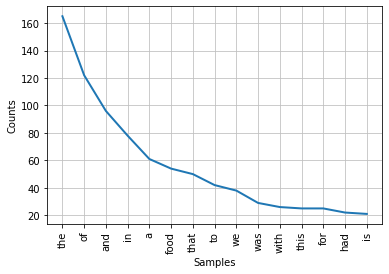

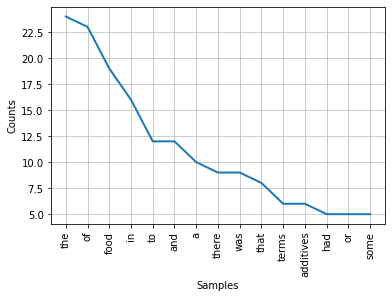

In [ ]:
#plotting the graph between text and the abstractive based summarization with the frequency of the words.
plotgraph(text1)
plotgraph(text2)

# Text Summarization(Extractive)

In [ ]:
!pip install -q bert-extractive-summarizer
!pip install -q spacy
!pip install -q transformers
!pip install -q neuralcoref

In [ ]:
from summarizer import Summarizer
from pprint import pprint

In [ ]:
#using the extractive summarizer
model = Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
#output of the summarized text with extractive method
full=""
res = model(result)
full = ''.join(res)

In [ ]:
print(full)

hello, my name is food toxicology would like to welcome back once again. one of the answers, one of the responses is to establish standards of behavior, standards of practice and legal standards so that we have a safe and pure food supply. these were highlighted in many, many national Publications like Good Housekeeping magazine. what he did, in fact, was to expand this Bureau chemistry staff and capability. it would be neat stored and great piles and thousands of rats would race about on it. we had mandatory inspection of livestock before Slaughter. we had sanitary standards established for slaughterhouses and meat processing plants in and actually authorize the USDA to do ongoing monitoring, inspection, Slaughter and processing operations. these first 1906 acts of Meat Inspection are actually with us today. okay, so this is 100 years old now we've 100 Years of history of Meat Inspection. and so what we found in this particular incident was many deaths are. nobody but almighty God and

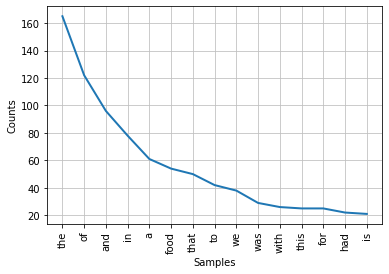

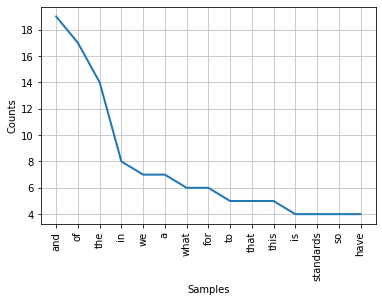

In [ ]:
#plotting the graph between text and the extractive based summarization with the frequency of the words.
plotgraph(text1)
plotgraph(text1)
plotgraph(full)

# Bigram model and smoothening

In [ ]:
#using the bigram model for the counts
from collections import defaultdict
from collections import Counter
from numpy.random import choice 
from tqdm import tqdm

class Bigram():
    def __init__(self):
        self.bigram_counts = defaultdict(Counter)
        self.unigram_counts = Counter()
        self.context = defaultdict(Counter)
        self.start_count = 0
        self.token_count = 0
        self.vocab_count = 0
    
    def convert_sentence(self, sentence):
        return ["<s>"] + [w.lower() for w in sentence] + ["</s>"]
    
    def get_counts(self, sentences):
        # collect unigram counts
        for sentence in sentences:
            sentence = self.convert_sentence(sentence)
            
            for word in sentence[1:]:  # from 1, because we don't need the <s> token
                self.unigram_counts[word] += 1
                
            self.start_count += 1
            
        # collect bigram counts
        for sentence in sentences:
            sentence = self.convert_sentence(sentence)
            bigram_list = zip(sentence[:-1], sentence[1:])
            for bigram in bigram_list:
                self.bigram_counts[bigram[0]][bigram[1]] += 1
                self.context[bigram[1]][bigram[0]] += 1
        self.token_count = sum(self.unigram_counts.values())
        self.vocab_count = len(self.unigram_counts.keys())
        
    def generate_sentence(self):
        current_word = "<s>"
        sentence = [current_word]
        while current_word != "</s>":
            prev_word = current_word
            prev_word_counts = self.bigram_counts[prev_word]
            # obtain bigram probability distribution given the previous word
            bigram_probs = []
            total_counts = float(sum(prev_word_counts.values()))
            for word in prev_word_counts:
                bigram_probs.append(prev_word_counts[word] / total_counts)
            # sample the next word
            current_word = choice(list(prev_word_counts.keys()), p=bigram_probs)
            sentence.append(current_word)
            
        sentence = " ".join(sentence[1:-1])
        return sentence

In [ ]:
#generating the sentences
import nltk
from nltk.tokenize import sent_tokenize
##from nltk.corpus import brown
nltk.download('punkt')
s=sent_tokenize(result)
l=[]
for i in s:
  l1=list(i.split(' '))
  l.append(l1)
  
print(l)
bigram = Bigram()
bigram.get_counts(l)
for i in range(len(l)):
    print("Sentence %d" % i)
    print(bigram.generate_sentence())
   

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['hello,', 'my', 'name', 'is', 'food', 'toxicology', 'would', 'like', 'to', 'welcome', 'back', 'once', 'again.'], ['today.'], ['the', 'subject', 'of', 'the', 'lecture', 'is', 'going', 'to', 'be', 'the', 'history', 'of', 'us', 'food', 'regulation,', 'and', 'then', 'those', 'of', 'you', 'that', 'there', 'are', 'new', 'to', 'this', 'field', 'might', 'ask', 'about', 'the', 'intersection', 'of', 'food', 'and', 'regulation.'], ['if', 'you', 'think', 'about', 'food', 'in', 'the', 'food', 'system', 'in', 'its', 'purest', 'sense,', 'when', 'we', 'were', 'all', 'eating', 'out', 'of', 'are', 'home', 'gardens,', 'are', 'on', 'farms,', 'it', 'was', 'a', 'complete', 'control', 'between', 'us', 'and', 'the', 'food', 'that', 'we', 'eat', 'at.'], ['as', 'we', 'started', 'broadening', 'out,', 'as', 'we', 'started', 'leaving', 'the', 'Farms,', 'coming', 'to', 'urban', 'areas,', 'we', 'had', 'more', 'and', 'more', 'distance', 'between', 'the', 'food', 'we', 'eat', 'and', 'the', 'production', 'sources.'],

In [ ]:
#taking the text data for finding out the perplexity
import math
from random import shuffle
import nltk

def split_train_test():
    sents = l
    shuffle(sents)
    cutoff = int(0.8*len(sents))
    training_set = sents[:cutoff]
    test_set = [[word.lower() for word in sent] for sent in sents[cutoff:]]
    return training_set, test_set

def calculate_perplexity(sentences, bigram, smoothing_function, parameter):
    total_log_prob = 0
    test_token_count = 0
    for sentence in tqdm(sentences):
        test_token_count += len(sentence) + 1 # have to consider the end token
        total_log_prob += smoothing_function(sentence, bigram, parameter)
    return math.exp(-total_log_prob / test_token_count)

training_set, test_set = split_train_test()
print(training_set)

[['now,', 'there', 'were', 'some', 'problems', 'with', 'the', 'enforcement', 'in', 'the', '1930sfree', 'Technologies.'], ['go', 'ahead', 'and', 'read', 'this.'], ['they', 'would', 'die', 'and', 'then', 'the', 'rats,', 'bread', 'and', 'meat', 'would', 'go', 'into', 'Hoppers', 'together.'], ['we', 'had', 'a', 'tremendous', 'amount', 'of', 'concern', 'over', 'our', 'environment', 'and', 'its', 'impact', 'on', 'the', 'human', 'food', 'chain,', 'and', 'so', 'this', 'actually', 'set', 'up', 'a', 'particularly', 'aggressive', 'challenge', 'using', 'the', 'older', 'format', 'of', 'the', 'law,', 'including', 'the', 'Delaney', 'clause,', 'for', 'these', 'modern', 'identify', 'problems,', 'especially', 'problems', 'with', 'chemical', 'residues', 'in', 'food,', 'some', 'of', 'the', 'problems', 'associated', 'with.'], ['the', 'number', 'of', 'people', 'involved', 'in', 'agriculture', 'now', 'is', 'on', 'the', 'order', 'of', 'two', 'to', 'four', 'percent.'], ['it', 'would', 'be', 'beneath', 'that', 

In [ ]:
#using the interpolation method
def interpolation(text2, bigram, lambdas):
    bigram_lambda = lambdas[0]
    unigram_lambda = lambdas[1]
    zerogram_lambda = 1 - lambdas[0] - lambdas[1]
    
    sentence = bigram.convert_sentence(text2)
    bigram_list = zip(sentence[:-1], sentence[1:])
    prob = 0
    
    for prev_word, word in bigram_list:
        # bigram probability
        sm_bigram_counts = bigram.bigram_counts[prev_word][word]
        if sm_bigram_counts == 0: interp_bigram_counts = 0
        else:
            if prev_word == "<s>": u_counts = bigram.start_count
            else: u_counts = bigram.unigram_counts[prev_word]
            interp_bigram_counts = sm_bigram_counts / float(u_counts) * bigram_lambda

        # unigram probability
        interp_unigram_counts = (bigram.unigram_counts[word] / bigram.token_count) * unigram_lambda

        # "zerogram" probability: this is to account for out-of-vocabulary words, this is just 1 / |V|
        vocab_size = len(bigram.unigram_counts)
        interp_zerogram_counts = (1 / float(vocab_size)) * zerogram_lambda
    
        prob += math.log(interp_bigram_counts + interp_unigram_counts + interp_zerogram_counts)
    return prob

bigram_interpolation = Bigram()
bigram_interpolation.get_counts(training_set)
plex_interpolation = calculate_perplexity(test_set, bigram_interpolation, interpolation, (0.8, 0.19))
#printing out the perplexity
print(plex_interpolation)

100%|██████████| 19/19 [00:00<00:00, 4788.31it/s]

1070.463080935843


In [ ]:
##using the laplacian smoothing method
def laplacian_smoothing(sentence, bigram, parameter):
    sentence = bigram.convert_sentence(sentence)
    bigram_list = zip(sentence[:-1], sentence[1:])
    prob = 0
    for prev_word, word in bigram_list:
        sm_bigram_counts = bigram.bigram_counts[prev_word][word] + 1
        if prev_word == "<s>": sm_unigram_counts = bigram.start_count
        else: sm_unigram_counts = bigram.unigram_counts[prev_word] + len(bigram.unigram_counts)
        prob += math.log(sm_bigram_counts / sm_unigram_counts)
    return prob

bigram_laplacian_smoothing = Bigram()
bigram_laplacian_smoothing.get_counts(training_set)
plex_laplacian_smoothing = calculate_perplexity(test_set, bigram_laplacian_smoothing, laplacian_smoothing, None)
#printing out the perplexity
print(plex_laplacian_smoothing)

100%|██████████| 6/6 [00:00<00:00, 10110.82it/s]

250.58714969752577


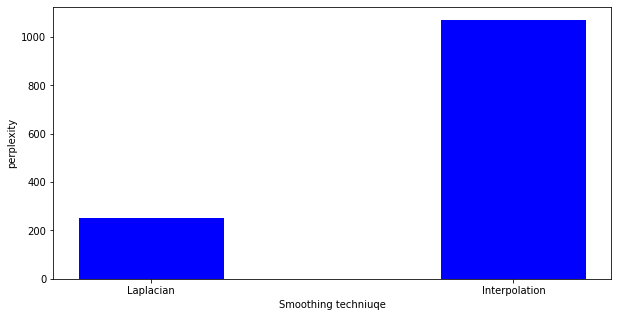

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data={'Laplacian': 250.587,'Interpolation':1070.463}
ST=list(data.keys())
perp=list(data.values())

fig=plt.figure(figsize=(10,5))

plt.bar(ST,perp, color='blue', width=0.4)
#printing out the perplexity between the two methods
plt.xlabel("Smoothing techniuqe")
plt.ylabel("perplexity")
plt.show()